In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/2018drives_augmented.tsv", sep="\t", index_col=False)
df

,offense,defense,game_id,id,plays,start_yardline,yards,end_yardline,drive_result,points,start_distance,dist_range
0,Alabama,Louisville,401012246,4010122461,7,35,65,100,TD,7,65,"(60.0, 65.0]"
1,Louisville,Alabama,401012246,4010122462,4,75,20,55,PUNT,0,75,"(70.0, 75.0]"
2,Alabama,Louisville,401012246,4010122463,8,20,63,65,FUMBLE,0,80,"(75.0, 80.0]"
3,Louisville,Alabama,401012246,4010122464,3,83,-1,84,PUNT,0,83,"(80.0, 85.0]"
4,Alabama,Louisville,401012246,4010122465,6,45,55,100,TD,7,55,"(50.0, 55.0]"
5,Louisville,Alabama,401012246,4010122466,8,75,49,26,INT,0,75,"(70.0, 75.0]"
6,Alabama,Louisville,401012246,4010122467,6,25,75,100,TD,7,75,"(70.0, 75.0]"
7,Louisville,Alabama,401012246,4010122468,6,86,31,55,PUNT,0,86,"(85.0, 90.0]"
8,Alabama,Louisville,401012246,4010122469,5,22,19,41,PUNT,0,78,"(75.0, 80.0]"
9,Louisville,Alabama,401012246,40101224610,4,80,20,60,PUNT,0,80,"(75.0, 80.0]"


In [2]:
grouped_df = pd.read_csv("Data/2018drives_grouped.tsv", sep="\t", index_col=False)
grouped_df

,start_distance,driveCount,meanPPD
0,3,15,5.800000
1,7,12,5.333333
2,9,11,5.272727
3,10,11,5.000000
4,11,13,4.692308
5,13,15,4.533333
6,14,15,4.666667
7,15,12,5.666667
8,18,14,3.857143
9,19,10,3.000000


In [3]:
from sklearn.linear_model import LinearRegression

x = np.array(grouped_df["start_distance"]).reshape(-1, 1)
y = np.array(grouped_df["meanPPD"]).reshape(-1, 1)
weights = np.array(grouped_df["driveCount"])

reg = LinearRegression().fit(x, y, sample_weight=weights)
print(reg.score(x, y, sample_weight=weights))
print()
print(reg.coef_)
print(reg.intercept_)

0.8277599759793306

[[-0.04520032]]
[5.32487387]


In [4]:
df = df[["offense", "defense", "game_id", "start_distance", "points"]].copy()
df["expectedPoints"] = reg.predict(np.array(df["start_distance"]).reshape(-1, 1))
df

,offense,defense,game_id,start_distance,points,expectedPoints
0,Alabama,Louisville,401012246,65,7,2.386853
1,Louisville,Alabama,401012246,75,0,1.934850
2,Alabama,Louisville,401012246,80,0,1.708848
3,Louisville,Alabama,401012246,83,0,1.573247
4,Alabama,Louisville,401012246,55,7,2.838856
5,Louisville,Alabama,401012246,75,0,1.934850
6,Alabama,Louisville,401012246,75,7,1.934850
7,Louisville,Alabama,401012246,86,0,1.437646
8,Alabama,Louisville,401012246,78,0,1.799249
9,Louisville,Alabama,401012246,80,0,1.708848


In [5]:
df["PRE"] = df["points"] - df["expectedPoints"]
df

,offense,defense,game_id,start_distance,points,expectedPoints,PRE
0,Alabama,Louisville,401012246,65,7,2.386853,4.613147
1,Louisville,Alabama,401012246,75,0,1.934850,-1.934850
2,Alabama,Louisville,401012246,80,0,1.708848,-1.708848
3,Louisville,Alabama,401012246,83,0,1.573247,-1.573247
4,Alabama,Louisville,401012246,55,7,2.838856,4.161144
5,Louisville,Alabama,401012246,75,0,1.934850,-1.934850
6,Alabama,Louisville,401012246,75,7,1.934850,5.065150
7,Louisville,Alabama,401012246,86,0,1.437646,-1.437646
8,Alabama,Louisville,401012246,78,0,1.799249,-1.799249
9,Louisville,Alabama,401012246,80,0,1.708848,-1.708848


In [6]:
teams_df = df.groupby(by=["offense"]).agg(["mean"])["PRE"]
teams_df.columns = ["OPRE"]
teams_df.index.name = "team"
teams_df

,OPRE
team,
Air Force,0.175804
Akron,-0.884153
Alabama,1.749527
Appalachian State,0.363252
Arizona,-0.152115
Arizona State,0.491906
Arkansas,-0.398073
Arkansas State,-0.125106
Army,1.185737


In [7]:
defenses = df.groupby(by=["defense"]).agg(["mean"])["PRE"]
defenses.columns = ["DPRE"]
defenses.index.name = "team"
defenses

,DPRE
team,
Air Force,0.269519
Akron,-0.646530
Alabama,-1.147062
Appalachian State,-0.722994
Arizona,-0.020046
Arizona State,-0.054289
Arkansas,0.203776
Arkansas State,0.449896
Army,-0.084765


In [8]:
teams_df = pd.merge(teams_df, defenses, how="inner", left_index=True, right_index=True)
for index, row in teams_df.iterrows():
    print(index)
    print(row)

Air Force
OPRE    0.175804
DPRE    0.269519
Name: Air Force, dtype: float64
Akron
OPRE   -0.884153
DPRE   -0.646530
Name: Akron, dtype: float64
Alabama
OPRE    1.749527
DPRE   -1.147062
Name: Alabama, dtype: float64
Appalachian State
OPRE    0.363252
DPRE   -0.722994
Name: Appalachian State, dtype: float64
Arizona
OPRE   -0.152115
DPRE   -0.020046
Name: Arizona, dtype: float64
Arizona State
OPRE    0.491906
DPRE   -0.054289
Name: Arizona State, dtype: float64
Arkansas
OPRE   -0.398073
DPRE    0.203776
Name: Arkansas, dtype: float64
Arkansas State
OPRE   -0.125106
DPRE    0.449896
Name: Arkansas State, dtype: float64
Army
OPRE    1.185737
DPRE   -0.084765
Name: Army, dtype: float64
Auburn
OPRE   -0.447203
DPRE   -0.741319
Name: Auburn, dtype: float64
BYU
OPRE   -0.249133
DPRE    0.112706
Name: BYU, dtype: float64
Ball State
OPRE   -0.295357
DPRE    0.483944
Name: Ball State, dtype: float64
Baylor
OPRE    0.090502
DPRE    0.582117
Name: Baylor, dtype: float64
Boise State
OPRE    0.810194

In [9]:
teams_df.sort_values(by="OPRE", ascending=False).head(10)

,OPRE,DPRE
team,,
Oklahoma,2.048562,0.198811
Alabama,1.749527,-1.147062
UCF,1.662833,-0.529530
Washington State,1.377987,-0.025625
Ohio,1.193939,0.440416
Army,1.185737,-0.084765
Georgia Tech,1.151463,0.397154
Ohio State,1.042740,-0.288920
Georgia,1.021392,-0.756240


In [10]:
teams_df.sort_values(by="DPRE").head(10)

,OPRE,DPRE
team,,
Michigan,0.643111,-1.225941
Alabama,1.749527,-1.147062
Kentucky,-0.488756,-1.146182
Clemson,0.911748,-1.085638
Iowa,0.104358,-1.005314
UAB,0.120434,-1.001174
Temple,-0.266015,-0.968498
Utah State,0.582598,-0.966418
Mississippi State,0.163058,-0.962886


In [11]:
df

,offense,defense,game_id,start_distance,points,expectedPoints,PRE
0,Alabama,Louisville,401012246,65,7,2.386853,4.613147
1,Louisville,Alabama,401012246,75,0,1.934850,-1.934850
2,Alabama,Louisville,401012246,80,0,1.708848,-1.708848
3,Louisville,Alabama,401012246,83,0,1.573247,-1.573247
4,Alabama,Louisville,401012246,55,7,2.838856,4.161144
5,Louisville,Alabama,401012246,75,0,1.934850,-1.934850
6,Alabama,Louisville,401012246,75,7,1.934850,5.065150
7,Louisville,Alabama,401012246,86,0,1.437646,-1.437646
8,Alabama,Louisville,401012246,78,0,1.799249,-1.799249
9,Louisville,Alabama,401012246,80,0,1.708848,-1.708848


In [12]:
df["OPRE"] = 0.0
df["DPRE"] = 0.0

for index, row in df.iterrows():
    df.at[index, "OPRE"] = teams_df.at[df.at[index, "offense"], "OPRE"]
    df.at[index, "DPRE"] = teams_df.at[df.at[index, "defense"], "DPRE"]
df

,offense,defense,game_id,start_distance,points,expectedPoints,PRE,OPRE,DPRE
0,Alabama,Louisville,401012246,65,7,2.386853,4.613147,1.749527,1.141069
1,Louisville,Alabama,401012246,75,0,1.934850,-1.934850,-0.740013,-1.147062
2,Alabama,Louisville,401012246,80,0,1.708848,-1.708848,1.749527,1.141069
3,Louisville,Alabama,401012246,83,0,1.573247,-1.573247,-0.740013,-1.147062
4,Alabama,Louisville,401012246,55,7,2.838856,4.161144,1.749527,1.141069
5,Louisville,Alabama,401012246,75,0,1.934850,-1.934850,-0.740013,-1.147062
6,Alabama,Louisville,401012246,75,7,1.934850,5.065150,1.749527,1.141069
7,Louisville,Alabama,401012246,86,0,1.437646,-1.437646,-0.740013,-1.147062
8,Alabama,Louisville,401012246,78,0,1.799249,-1.799249,1.749527,1.141069
9,Louisville,Alabama,401012246,80,0,1.708848,-1.708848,-0.740013,-1.147062


In [13]:
df["OD_diff"] = df.OPRE + df.DPRE
df.OPRE = df.OPRE.round(1)
df.DPRE = df.DPRE.round(1)
df.OD_diff = df.OD_diff.round(1)
#df.PRE = df.PRE.round(1)
df

,offense,defense,game_id,start_distance,points,expectedPoints,PRE,OPRE,DPRE,OD_diff
0,Alabama,Louisville,401012246,65,7,2.386853,4.613147,1.7,1.1,2.9
1,Louisville,Alabama,401012246,75,0,1.934850,-1.934850,-0.7,-1.1,-1.9
2,Alabama,Louisville,401012246,80,0,1.708848,-1.708848,1.7,1.1,2.9
3,Louisville,Alabama,401012246,83,0,1.573247,-1.573247,-0.7,-1.1,-1.9
4,Alabama,Louisville,401012246,55,7,2.838856,4.161144,1.7,1.1,2.9
5,Louisville,Alabama,401012246,75,0,1.934850,-1.934850,-0.7,-1.1,-1.9
6,Alabama,Louisville,401012246,75,7,1.934850,5.065150,1.7,1.1,2.9
7,Louisville,Alabama,401012246,86,0,1.437646,-1.437646,-0.7,-1.1,-1.9
8,Alabama,Louisville,401012246,78,0,1.799249,-1.799249,1.7,1.1,2.9
9,Louisville,Alabama,401012246,80,0,1.708848,-1.708848,-0.7,-1.1,-1.9


In [14]:
diff_grouped = df.groupby("OD_diff").agg(["count", "mean"])["PRE"]
diff_grouped.columns = ["driveCount", "meanPRE"]
diff_grouped

,driveCount,meanPRE
OD_diff,,
-2.2,10,-0.381168
-2.1,13,-1.115651
-2.0,30,-2.177797
-1.9,38,-1.768628
-1.8,76,-1.183746
-1.7,81,-1.367241
-1.6,114,-1.194054
-1.5,143,-0.845609
-1.4,96,-1.325392


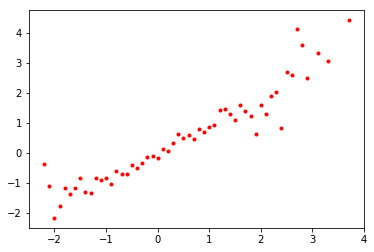

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(diff_grouped.index, diff_grouped.meanPRE, "r.")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

